In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import h5py
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [18]:
Classifier = Sequential()
Classifier.add(Convolution2D(32,3,3,input_shape=(220,220,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(3, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [97]:
training_set=train_datagen.flow_from_directory('data/Train',target_size=(220,220),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data/Test',target_size=(220,220),batch_size=32,class_mode='categorical')

Found 706 images belonging to 3 classes.
Found 227 images belonging to 3 classes.


In [76]:
img_dims = 150
epochs = 15
batch_size = 32

In [77]:
history = Classifier.fit_generator( training_set, 
                                   steps_per_epoch=training_set.samples // batch_size,
                                   epochs = epochs, 
                                   validation_data=test_set,
                                   validation_steps=test_set.samples // batch_size)

Epoch 1/15
22/22 [==============================] - 17s 762ms/step - loss: 0.2973 - accuracy: 0.9065 - val_loss: 1.2867 - val_accuracy: 0.4777
Epoch 2/15
22/22 [==============================] - 16s 713ms/step - loss: 0.3426 - accuracy: 0.8754 - val_loss: 1.2141 - val_accuracy: 0.5134
Epoch 3/15
22/22 [==============================] - 16s 741ms/step - loss: 0.2982 - accuracy: 0.9036 - val_loss: 1.1207 - val_accuracy: 0.5580
Epoch 4/15
22/22 [==============================] - 17s 769ms/step - loss: 0.3298 - accuracy: 0.8887 - val_loss: 1.5182 - val_accuracy: 0.4821
Epoch 5/15
22/22 [==============================] - 16s 749ms/step - loss: 0.2735 - accuracy: 0.9258 - val_loss: 1.4293 - val_accuracy: 0.5625
Epoch 6/15
22/22 [==============================] - 16s 713ms/step - loss: 0.3529 - accuracy: 0.8546 - val_loss: 1.3032 - val_accuracy: 0.5402
Epoch 7/15
22/22 [==============================] - 17s 760ms/step - loss: 0.2493 - accuracy: 0.9184 - val_loss: 1.8507 - val_accuracy: 0.4955

In [78]:
Classifier.save('skin_cancer1.h5')       
model=load_model('skin_cancer1.h5')

Melanoma


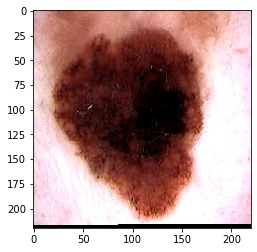

In [114]:
def pred(path):
    t_img = image.load_img(path, target_size=(220,220))
    img = plt.imshow(t_img)
    t_img=np.expand_dims(t_img,axis=0)
    result = model.predict(t_img)
    prediction = result[0]
    classes=training_set.class_indices
    prediction=list(prediction)
    classes=['malignant','squamous cell carcinoma','vascular lesion']
    output=zip(classes,prediction)
    output=dict(output)
    
    if output["malignant"] == 1.0:
        print("Melanoma")
    elif output["squamous cell carcinoma"] ==1.0:
        print("squamous cell carcinoma")
    else:
        print("vascular lesion")
    

pred('data\Test\malignant\ISIC_4523382.jpg')

Melanoma


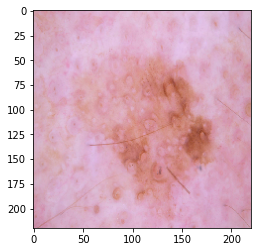

In [115]:
pred('data\Test\squamous cell carcinoma\ISIC_0025089.jpg')

Melanoma


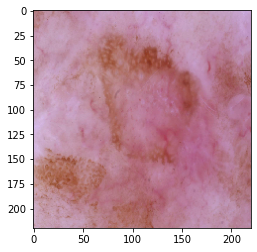

In [116]:
pred('data\Test\squamous cell carcinoma\ISIC_0025712.jpg')

vascular lesion


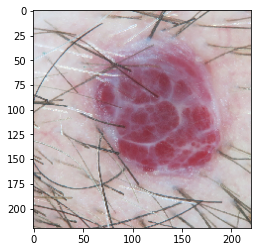

In [117]:
pred('data\Test\\vascular lesion\ISIC_0070723.jpg')

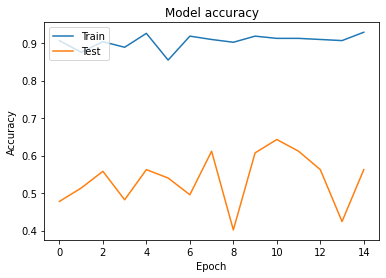

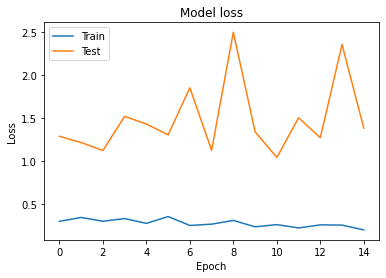

In [109]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()